
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

### Гипотезы:

1) Женщины покупают одежду чаще, чем мужчины (за все сезоны)
2) Мужчины зимой покупают одежду в категории "Outerwear" чаще, чем женщины
3) Теперь проверю гипотезу: взрослые женщины (>30) покупают одежду реже, чем молодые (от 18 до 30) во все сезоны.
4) В локациях: 
New York,
Alabama,
Montana,
Louisiana,
North Carolina,
California,
Florida,
North Carolina
чаще выбирают экспресс-доставку, чем в
Hawaii,
Rhode Island,
Mississippi,
Kansas,
Ohio,
Alaska,
Texas,
Maryland.
5) Покупатели с активной подпиской чаще используют скидки
6) Покупатели, использующие кредитные карты, совершают более крупные покупки, чем те, кто использует наличные или дебетовые карты.
7) Покупатели в возрасте 30-40 лет совершают больше повторных покупок

In [118]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    current_dir = Path(__file__).parent.resolve()
except NameError:
    current_dir = Path().resolve()

file_path = current_dir / "shopping_trends.csv"

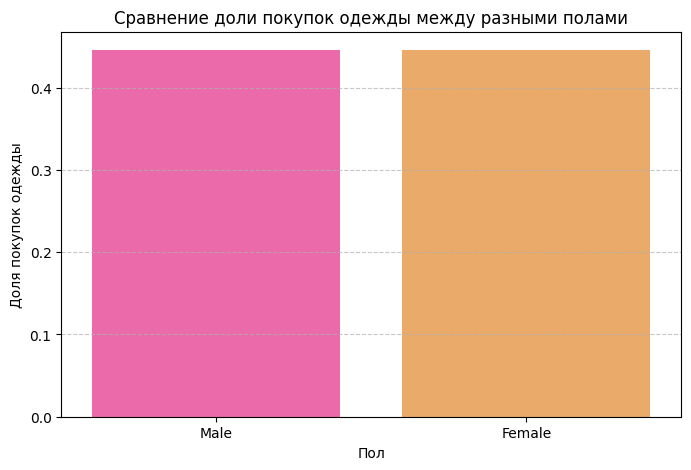

In [119]:
data = pd.read_csv(file_path)

# Разделю выборку на мужчин и женщин
male_customers = data[data['Gender'] == 'Male']
female_customers = data[data['Gender'] == 'Female']

# Подсчет покупок в категории одежда
male_clothing = male_customers[male_customers['Category'] == 'Clothing'].shape[0]
female_clothing = female_customers[female_customers['Category'] == 'Clothing'].shape[0]

# суммарное количество покупок
total_male_clothing = male_customers.shape[0]
total_female_clothing = female_customers.shape[0]

# доля покупок
male_ratio = male_clothing / total_male_clothing if total_male_clothing > 0 else 0
female_ratio = female_clothing / total_female_clothing if total_female_clothing > 0 else 0

data_to_plot = pd.DataFrame({
    'Gender Group': ['Male', 'Female'],
    'Clothing Purchase Ratio': [male_ratio, female_ratio]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data_to_plot, x='Gender Group', y='Clothing Purchase Ratio',
            palette='spring', hue='Gender Group', dodge=False)
plt.title('Сравнение доли покупок одежды между разными полами')
plt.ylabel('Доля покупок одежды')
plt.xlabel('Пол')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Моя гипотеза не подтвердилась. Мужчины и женщины покупают одежду одинаково. Теперь посмотрю, что будет, если посмотреть другую категорию. Например "Outerwear" и сезон == зима.

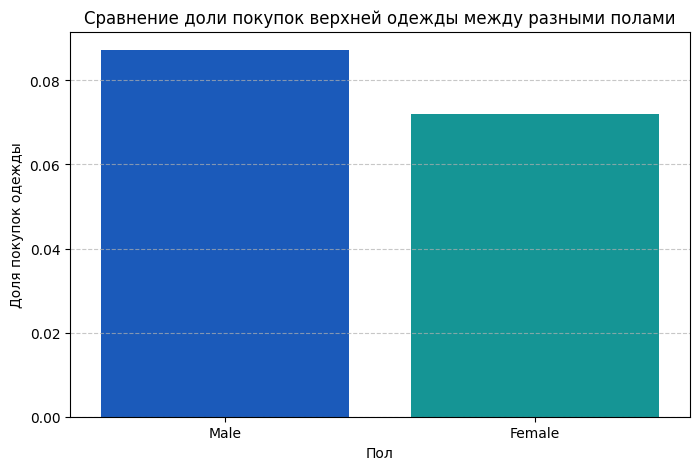

In [120]:
# Разделю выборку на мужчин и женщин и возьму сезон только зиму
male_customers = data[(data['Gender'] == 'Male') & (data['Season'] == 'Winter')]
female_customers = data[(data['Gender'] == 'Female') & (data['Season'] == 'Winter')]

# Подсчет покупок в категории Outerwear
male_outerwear = male_customers[male_customers['Category'] == 'Outerwear'].shape[0]
female_outerwearg = female_customers[female_customers['Category'] == 'Outerwear'].shape[0]

# суммарное количество покупок
total_male_outerwear = male_customers.shape[0]
total_female_outerwear = female_customers.shape[0]

# доля покупок
male_ratio = male_outerwear / total_male_outerwear if total_male_outerwear > 0 else 0
female_ratio = female_outerwearg / total_female_outerwear if total_female_outerwear > 0 else 0

data_to_plot = pd.DataFrame({
    'Gender Group': ['Male', 'Female'],
    'Outerwear Purchase Ratio': [male_ratio, female_ratio]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data_to_plot, x='Gender Group', y='Outerwear Purchase Ratio',
            palette='winter', hue='Gender Group', dodge=False)
plt.title('Сравнение доли покупок верхней одежды между разными полами')
plt.ylabel('Доля покупок одежды')
plt.xlabel('Пол')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Моя гипотеза подтвердилась. Я подумала, что так будет, потому что мужчины обычно решают вопросы одежды по необходимости. То есть они начали мерзнуть, и пошли покупать себе утепленную одежду. 

Теперь проверю гипотезу: взрослые женщины (>30) покупают одежду реже, чем молодые (от 18 до 30) во все сезоны.

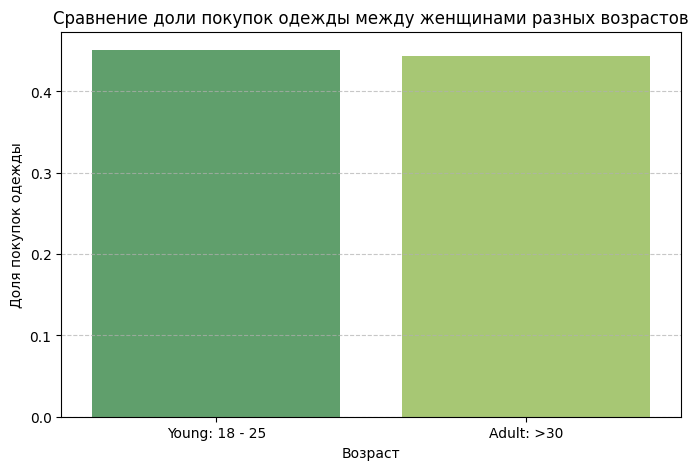

In [121]:
# Разделю выборку женщин по возрастам
young_women = data[(data['Gender'] == 'Female') & (data['Age'] >= 18) & (data['Age'] <= 30)]
adult_women = data[(data['Gender'] == 'Female') & (data['Age'] > 30)]

# Подсчёт покупок одежды (всех сезонов)
young_women_clothing = young_women[young_women['Category'] == 'Clothing'].shape[0]
adult_women_clothing = adult_women[adult_women['Category'] == 'Clothing'].shape[0]

# суммарное количество покупок
total_young_women_clothing = young_women.shape[0]
total_adult_women_clothing = adult_women.shape[0]

# доля покупок
young_women_clothing_ratio = young_women_clothing / total_young_women_clothing if total_young_women_clothing > 0 else 0
adult_women_clothing_ratio = adult_women_clothing / total_adult_women_clothing if total_adult_women_clothing > 0 else 0

data_to_plot = pd.DataFrame({
    'Age Group': ['Young: 18 - 25', 'Adult: >30'],
    'Clothing Purchase Ratio': [young_women_clothing_ratio, adult_women_clothing_ratio]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data_to_plot, x='Age Group', y='Clothing Purchase Ratio',
            palette='summer', hue='Age Group', dodge=False)
plt.title('Сравнение доли покупок одежды между женщинами разных возрастов')
plt.ylabel('Доля покупок одежды')
plt.xlabel('Возраст')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Моя гипотеза подтвердилась: действительно, молодые девушки покупают одежду чуть - чуть чаще, взрослые. Мне кажется, это связано с тем, что взрослые предпочитают более качественную одежду, которая дольше "живет", а также потому что они работают и у них нет времени ходить по магазинам:)

Проверю гипотезу: В локациях: 
New York,
Alabama,
Montana,
Louisiana,
North Carolina,
California,
Florida,
North Carolina
чаще выбирают экспресс-доставку, чем в
Hawaii,
Rhode Island,
Mississippi,
Kansas,
Ohio,
Alaska,
Texas,
Maryland.

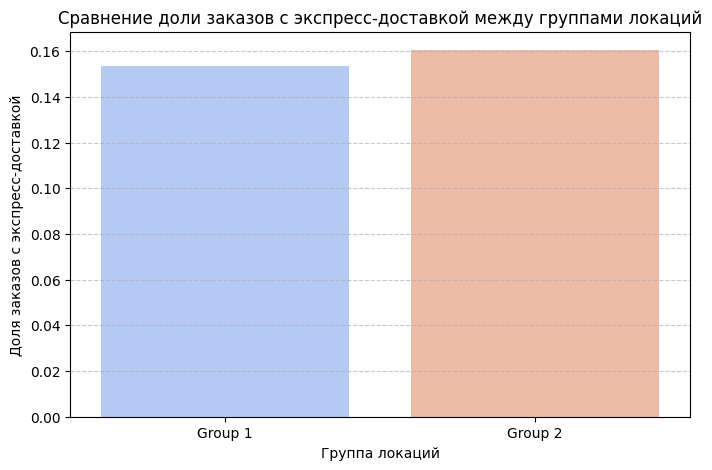

In [122]:
# выделю группы локаций
group_1_locations = ['New York', 'Alabama', 'Montana', 'Louisiana',
                     'North Carolina', 'California', 'Florida', 'North Carolina', 'Pennsylvania']
group_2_locations = ['Hawaii', 'Rhode Island', 'Mississippi', 'Kansas',
                     'Ohio', 'Alaska', 'Texas', 'Maryland', 'New Hampshire']

# фильтр для групп
group_1_data = data[data['Location'].isin(group_1_locations)]
group_2_data = data[data['Location'].isin(group_2_locations)]

# с экспресс-доставкой
group_1_express = group_1_data[group_1_data['Shipping Type'] == 'Express'].shape[0]
group_2_express = group_2_data[group_2_data['Shipping Type'] == 'Express'].shape[0]

# общее количество заказов
total_group_1 = group_1_data.shape[0]
total_group_2 = group_2_data.shape[0]

# доли заказов с экспресс-доставкой
group_1_ratio = group_1_express / total_group_1 if total_group_1 > 0 else 0
group_2_ratio = group_2_express / total_group_2 if total_group_2 > 0 else 0

# подготовка данных для графика
data_to_plot = pd.DataFrame({
    'Location Group': ['Group 1', 'Group 2'],
    'Express Delivery Ratio': [group_1_ratio, group_2_ratio]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data_to_plot, x='Location Group', y='Express Delivery Ratio',
            palette='coolwarm', hue='Location Group', dodge=False)
plt.title('Сравнение доли заказов с экспресс-доставкой между группами локаций')
plt.xlabel('Группа локаций')
plt.ylabel('Доля заказов с экспресс-доставкой')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Моя гипотеза не подтвердилась. Я выдвинула такую гипотезу, потому что мне казалось, что в крупных городах/штатах будут чаще выбирать экспресс доставку, нежели на островах и в отдаленных штатах

Проверю гипотезу: Покупатели с активной подпиской чаще используют скидки

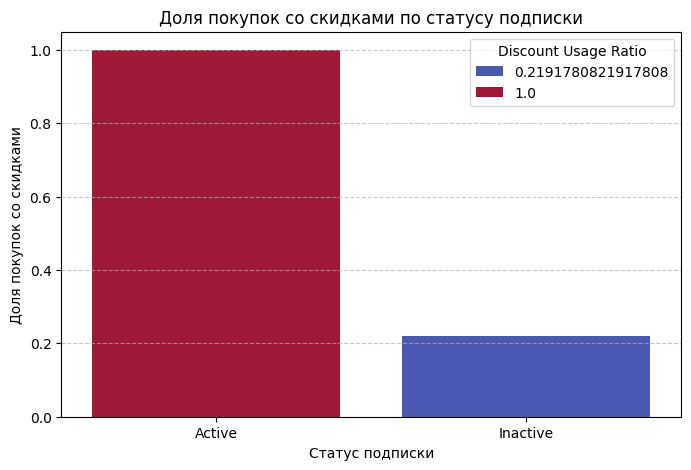

In [123]:
# фильтрация по статусу подписки
active_subscribers = data[data['Subscription Status'] == 'Yes']
inactive_subscribers = data[data['Subscription Status'] == 'No']

# сколько покупок со скидками
active_discounts = active_subscribers[active_subscribers['Discount Applied'] == 'Yes'].shape[0]
inactive_discounts = inactive_subscribers[inactive_subscribers['Discount Applied'] == 'Yes'].shape[0]

# общее количество покупок
total_active = active_subscribers.shape[0]
total_inactive = inactive_subscribers.shape[0]

# доли покупок со скидками
active_ratio = active_discounts / total_active if total_active > 0 else 0
inactive_ratio = inactive_discounts / total_inactive if total_inactive > 0 else 0

# подготовка данных для графика
data_to_plot = pd.DataFrame({
    'Subscription Status': ['Active', 'Inactive'],
    'Discount Usage Ratio': [active_ratio, inactive_ratio]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data_to_plot, x='Subscription Status', y='Discount Usage Ratio',
            palette='coolwarm', hue='Discount Usage Ratio', dodge=False)
plt.title('Доля покупок со скидками по статусу подписки')
plt.xlabel('Статус подписки')
plt.ylabel('Доля покупок со скидками')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Моя гипотеза подтвердилась, теперь проверю, что покупатели, использующие кредитные карты, совершают более крупные покупки, чем те, кто использует наличные или дебетовые карты.

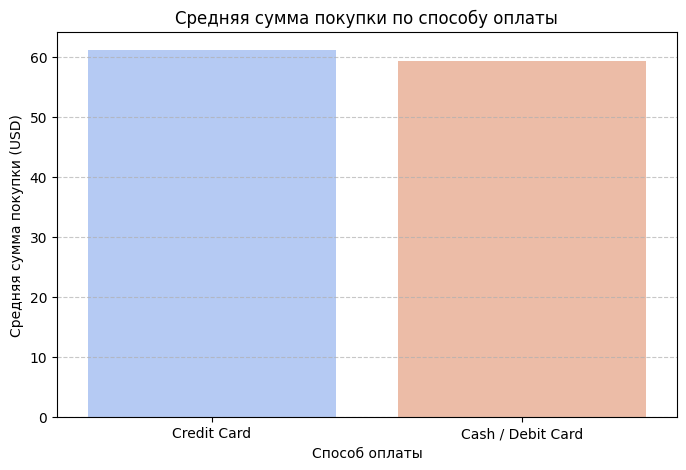

In [124]:
# по способу оплаты
credit_card_customers = data[data['Payment Method'] == 'Credit Card']
other_payment_customers = data[data['Payment Method'].isin(['Cash', 'Debit Card'])]

# средняя сумма покупки для каждой группы
credit_card_avg_purchase = credit_card_customers['Purchase Amount (USD)'].mean()
other_payment_avg_purchase = other_payment_customers['Purchase Amount (USD)'].mean()

# подготовка данных для графика
data_to_plot = pd.DataFrame({
    'Payment Method': ['Credit Card', 'Cash / Debit Card'],
    'Average Purchase Amount (USD)': [credit_card_avg_purchase, other_payment_avg_purchase]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data_to_plot, x='Payment Method', y='Average Purchase Amount (USD)',
            palette='coolwarm', hue='Payment Method', dodge=False)
plt.title('Средняя сумма покупки по способу оплаты')
plt.xlabel('Способ оплаты')
plt.ylabel('Средняя сумма покупки (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Моя гипотеза подтвердилась. И наконец проверю последнюю гипотезу: Покупатели в возрасте 30-40 лет совершают больше повторных покупок

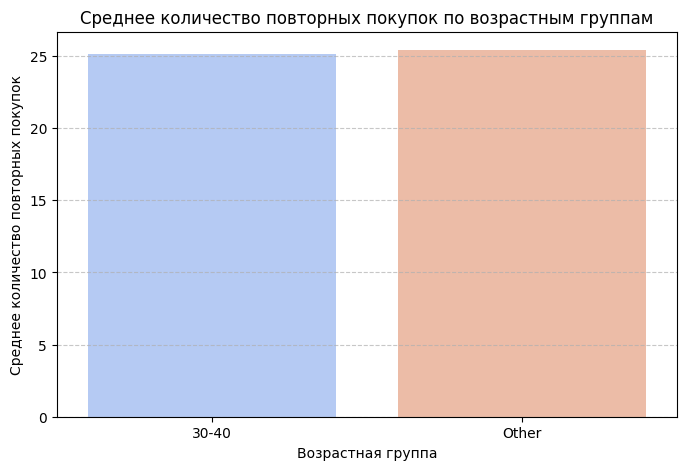

In [125]:
# разделю по возрастам
age_group_30_40 = data[(data['Age'] >= 30) & (data['Age'] <= 40)]
other_age_groups = data[(data['Age'] < 30) | (data['Age'] > 40)]

# среднее количество повторных покупок для каждой группы
avg_previous_purchases_30_40 = age_group_30_40['Previous Purchases'].mean()
avg_previous_purchases_other = other_age_groups['Previous Purchases'].mean()

# подготовка данных для графика
data_to_plot = pd.DataFrame({
    'Age Group': ['30-40', 'Other'],
    'Average Previous Purchases': [avg_previous_purchases_30_40, avg_previous_purchases_other]
})


plt.figure(figsize=(8, 5))
sns.barplot(data=data_to_plot, x='Age Group', y='Average Previous Purchases',
            palette='coolwarm', hue='Age Group', dodge=False)
plt.title('Среднее количество повторных покупок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Среднее количество повторных покупок')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Моя гипотеза не подтвердилась, среднее кол-во покупок для возрастов 30-40 и остальных является почти одинаковым.

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

In [126]:
# найдите самый популярный товар
popular_item_purchased = data['Item Purchased'].value_counts().idxmax()
print(f"Самый популярный товар: {popular_item_purchased}")

Самый популярный товар: Blouse


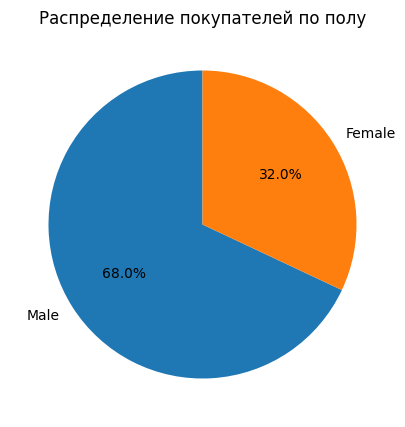

In [127]:
# постройте распределение покупателей по полу
gender_count = data['Gender'].value_counts()

plt.figure(figsize=(8, 5))
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Распределение покупателей по полу')
plt.ylabel('')
plt.show()

In [128]:
# определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

# Сначала посмотрю по только полу

# Кто покупает больше всего (по общей сумме покупок)
sum_purch = data.groupby('Gender')['Purchase Amount (USD)'].sum()
max_purc = sum_purch.idxmax()
max_purc_total = sum_purch.max()

# Кто покупает чаще (по количеству покупок)
purch_count = data.groupby('Gender')['Item Purchased'].count()
max_count_gender = purch_count.idxmax()
max_count = purch_count.max()

# Кто покупает самые дорогие товары (по средней сумме покупки)
average_purch = data.groupby('Gender')['Purchase Amount (USD)'].mean()
max_avg_gender = average_purch.idxmax()
max_avg_amount = average_purch.max()

# Результаты
print(f"Покупают больше всего: {max_purc}, тратя {max_purc_total} USD")
print(f"Покупают чаще всего: {max_count_gender}, общее кол-во: {max_count}")
print(f"Покупают самые дорогие товары: {max_avg_gender}, средний чек: {max_avg_amount} USD")


Покупают больше всего: Male, тратя 157890 USD
Покупают чаще всего: Male, общее кол-во: 2652
Покупают самые дорогие товары: Female, средний чек: 60.249198717948715 USD


In [129]:
#Теперь посмотрю по возрасту, независимо от пола: до 25, 25-30, больше 30:

# разбивка на возрастные категории
bins = [data['Age'].min(), 25, 30, data['Age'].max()]
labels = ['<=25', '25-30', '>30']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Кто покупает больше всего по общей сумме покупок
sum_purch_age = data.groupby('Age Group', observed=False)['Purchase Amount (USD)'].sum()
max_purc_age = sum_purch_age.idxmax()
max_purc_total_age = sum_purch_age.max()

# Кто покупает чаще по количеству покупок
purch_count_age = data.groupby('Age Group', observed=False)['Item Purchased'].count()
max_count_age = purch_count_age.idxmax()
max_count_age_total = purch_count_age.max()

# Кто покупает самые дорогие товары по средней сумме покупки
average_purch_age = data.groupby('Age Group', observed=False)['Purchase Amount (USD)'].mean()
max_avg_age = average_purch_age.idxmax()
max_avg_amount_age = average_purch_age.max()

print(f"Покупают больше всего (по возрасту): {max_purc_age}, тратя {max_purc_total_age} USD")
print(f"Покупают чаще всего (по возрасту): {max_count_age}, общее кол-во: {max_count_age_total}")
print(f"Покупают самые дорогие товары (по возрасту): {max_avg_age}, средний чек: {max_avg_amount_age} USD")

Покупают больше всего (по возрасту): >30, тратя 176366 USD
Покупают чаще всего (по возрасту): >30, общее кол-во: 2955
Покупают самые дорогие товары (по возрасту): 25-30, средний чек: 60.32397959183673 USD


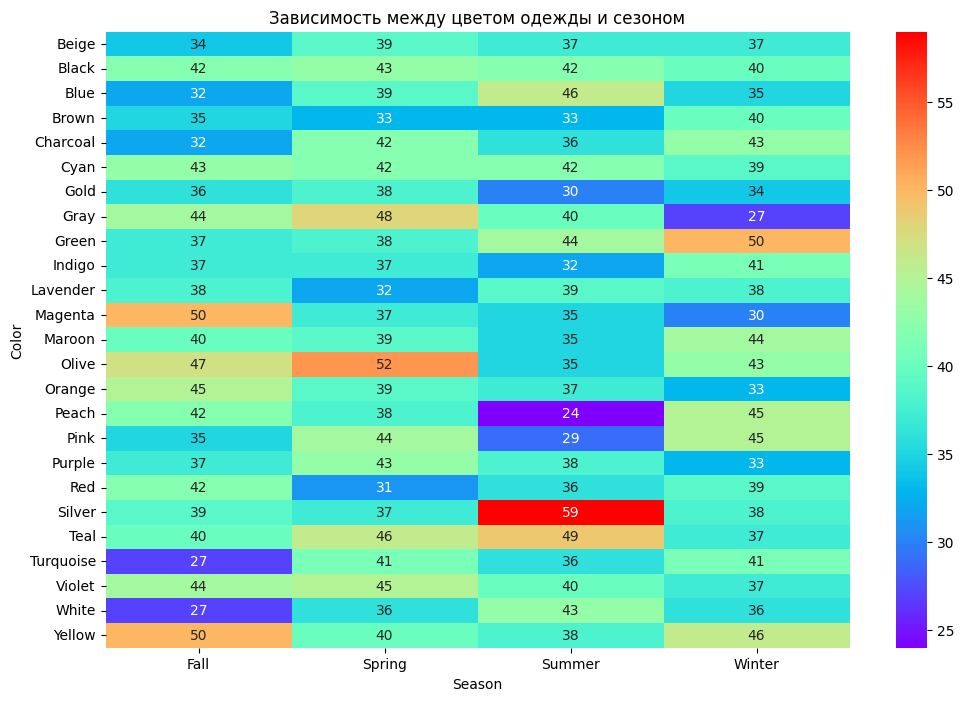

In [130]:
#определите, есть ли зависимость между цветом одежды и сезоном.

с_season_table = pd.crosstab(data['Color'], data['Season'])

plt.figure(figsize=(12, 8))
sns.heatmap(с_season_table, annot=True, cmap="rainbow", fmt="d")
plt.title('Зависимость между цветом одежды и сезоном')
plt.show()

Да, существуют цвета, которые предпочтительнее в разные времена года, потому что на hot-map цвета выделены разными цветами/цифрами:

Особенно контраститруют цвета: Blue, Gold, Gray, Green, Magenta, Olive, Peach, Pink, Silver, Turquoise, White, Yellow
А вот черный, Cyan, Maroon одинаково выбирают во все времена года

1) Осенью: чаще выбирают цвета: Magenta (и он совсем не предпочтителен зимой), Olive, Yellow, Gray, Cyan и совсем редко выбирают Turquoise, White, Blue, Charcoal
2) В то время как эти цвета (Turquoise, White, Blue, Charcoal) популярны в другие времена года
3) Например, весной и летом чаще выбирают: Tealm, Silver (летом особенно), Blue, Violet. Также весной популярен Olive, Gray
4) Но Gray совсем не популярен зимой. Зимой предпочитают Green, Yellow

посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.

Уникальные пользователи по сезону (MAU): Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64
Динамика MAU (изменение в процентах): Season
Fall           NaN
Spring    2.461538
Summer   -4.404404
Winter    1.675393
Name: Customer ID, dtype: float64


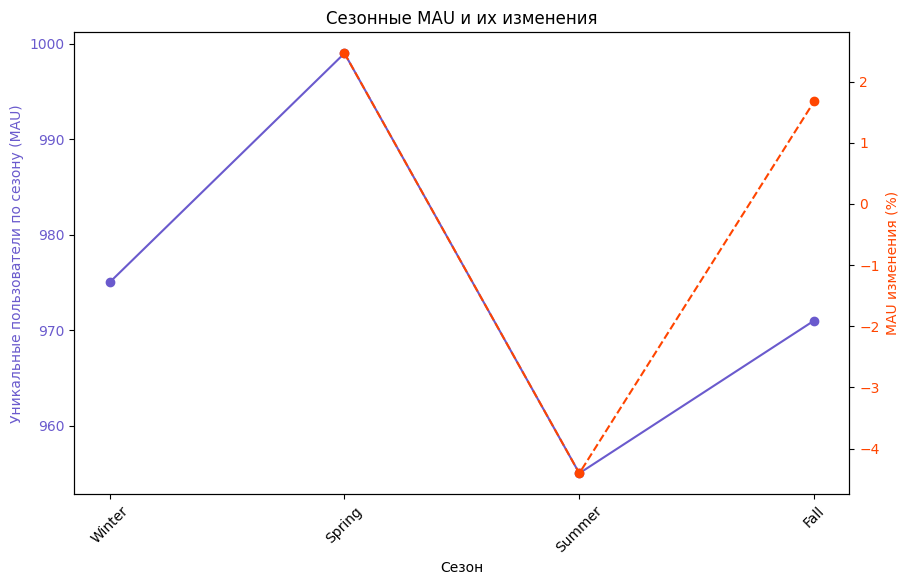

In [131]:
# число уникальных пользователей по сезонам
season_mau = data.groupby('Season')['Customer ID'].nunique()

# изменение MAU между сезонами
mau_changes = season_mau.pct_change() * 100

print(f"Уникальные пользователи по сезону (MAU): {season_mau}")

print(f"Динамика MAU (изменение в процентах): {mau_changes}")

seasons = ['Winter', 'Spring', 'Summer', 'Fall']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Сезон')
ax1.set_ylabel('Уникальные пользователи по сезону (MAU)', color='slateblue')
ax1.plot(season_mau.index, season_mau.values, color='slateblue', marker='o', label='MAU')
ax1.tick_params(axis='y', labelcolor='slateblue')

ax1.set_xticks(season_mau.index)
ax1.set_xticklabels(seasons, rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('MAU изменения (%)', color='orangered')
ax2.plot(mau_changes.index, mau_changes.values, color='orangered', marker='o', linestyle='--', label='MAU изменения (%)')
ax2.tick_params(axis='y', labelcolor='orangered')

plt.title('Сезонные MAU и их изменения')
plt.show()

найдите самую популярную букву в названии одежды

In [135]:
from collections import Counter

big_word = ''.join(data['Item Purchased'].str.lower())

let_counter = Counter(big_word)

let_counter = {k: v for k, v in let_counter.items() if k.isalpha()}
let_counter = Counter(let_counter)

popular_letter = let_counter.most_common(1)
print(f"Самая популярная буква в названии одежды: {popular_letter[0][0]} с частотой {popular_letter[0][1]}")

Самая популярная буква в названии одежды: s с частотой 4063


<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [138]:
file_path = current_dir / "drinks.csv"
df = pd.read_csv(file_path)

In [142]:
max_beer = df.loc[df['beer_servings'].idxmax()]
max_spirit = df.loc[df['spirit_servings'].idxmax()]
max_wine = df.loc[df['wine_servings'].idxmax()]
max_alcohol = df.loc[df['total_litres_of_pure_alcohol'].idxmax()]

# Печать стран с максимальными значениями
print("Страна с наибольшим потреблением пива (beer_servings):", max_beer['country'])
print("Страна с наибольшим потреблением крепких напитков (spirit_servings):", max_spirit['country'])
print("Страна с наибольшим потреблением вина (wine_servings):", max_wine['country'])
print("Страна с наибольшим потреблением общего спирта == алкоголя (total_litres_of_pure_alcohol):", max_alcohol['country'])

Страна с наибольшим потреблением пива (beer_servings): Namibia
Страна с наибольшим потреблением крепких напитков (spirit_servings): Grenada
Страна с наибольшим потреблением вина (wine_servings): France
Страна с наибольшим потреблением общего спирта == алкоголя (total_litres_of_pure_alcohol): Belarus


<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 